# Supervised Learning   

## League of Legends SoloQ matches at 15 minutes 2024

### Introduction

#### Dataset

This dataset was obtained from [Kaggle's LOL page](https://www.kaggle.com/datasets/karlorusovan/league-of-legends-soloq-matches-at-10-minutes-2024/data). The dataset contains data about the first 15 minutes of game play for over 24 thousand solo queue matches taken from european servers (EUNE and EUW).

Average ELO of the matches is between mid emerald to high diamond, which represents the top 10% of players, therefore (hopefully) reducing the probability of a player doing a game-changing mistake.

There are 14 features for red, and 14 features for the blue team (feature blueTeamFirstBlood counts for both teams since it tells us which team got the first kill), with the target feature being blueWin. blueWin == 1 indicates a victory of the blue team, and blueWin == 0 means that the red team won.

#### Problem

The main purpose of the dataset is to help train models to predict the winner based on how the first 15 minutes of the match played out.

#### Solution

We will train a supervised learning model using the aforementioned dataset. Therefore, the downloaded dataset will be split into a training and a test set, so that we can train the model and evaluate it afterwards. We will evaluate the model utilizing accuracy, precision, sensitivity and F-measure, depending on our needs.

### Libraries

In [85]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math

### Creating Dataframe

In [87]:
df = pd.read_csv('match_data_v5.csv')

df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,EUW1_6882489515',2,23,4,2,0,0,0,7,0,...,2,0,1,400,94,29637,32613,27239,1,0
1,EUW1_6882416210',2,46,12,1,0,1,0,10,0,...,1,0,4,373,76,28970,30320,36585,0,0
2,EUW1_6881092720',2,19,13,0,0,0,0,11,0,...,2,0,3,340,84,30510,29464,42984,0,0
3,EUW1_6879405717',3,28,8,0,1,1,0,9,1,...,0,0,5,378,87,25157,31069,28229,0,0
4,EUW1_6879389461',3,30,11,1,1,1,0,7,0,...,1,0,5,382,96,26052,29475,19245,1,0


As you can see, for some reason, the downloaded dataset does not have headers. Let's go ahead and label them, by the order they are displayed on the website.

In [88]:
df.columns =["matchID","blueTeamControlWardsPlaced","blueTeamWardsPlaced","blueTeamTotalKills","blueTeamDragonKills","blueTeamHeraldKills","blueTeamTowersDestroyed","blueTeamInhibitorsDestroyed","blueTeamTurretPlatesDestroyed","blueTeamFirstBlood","blueTeamMinionsKilled","blueTeamJungleMinions","blueTeamTotalGold","blueTeamXp","blueTeamTotalDamageToChamps","redTeamControlWardsPlaced","redTeamWardsPlaced","redTeamTotalKills","redTeamDragonKills","redTeamHeraldKills","redTeamTowersDestroyed","redTeamInhibitorsDestroyed","redTeamTurretPlatesDestroyed","redTeamMinionsKilled","redTeamJungleMinions","redTeamTotalGold","redTeamXp","redTeamTotalDamageToChamps","blueWin","empty"]

df.head()

,matchID,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,...,redTeamTowersDestroyed,redTeamInhibitorsDestroyed,redTeamTurretPlatesDestroyed,redTeamMinionsKilled,redTeamJungleMinions,redTeamTotalGold,redTeamXp,redTeamTotalDamageToChamps,blueWin,empty
0,EUW1_6882489515',2,23,4,2,0,0,0,7,0,...,2,0,1,400,94,29637,32613,27239,1,0
1,EUW1_6882416210',2,46,12,1,0,1,0,10,0,...,1,0,4,373,76,28970,30320,36585,0,0
2,EUW1_6881092720',2,19,13,0,0,0,0,11,0,...,2,0,3,340,84,30510,29464,42984,0,0
3,EUW1_6879405717',3,28,8,0,1,1,0,9,1,...,0,0,5,378,87,25157,31069,28229,0,0
4,EUW1_6879389461',3,30,11,1,1,1,0,7,0,...,1,0,5,382,96,26052,29475,19245,1,0


Now that we see the dataset labeled correctly, we can see that there are only numerical values, except for `matchID`, and that there is an extra column that only consists of zeros.

In [89]:
df['empty'].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: empty, dtype: int64

Therefore, we will remove both columns from the dataset.

In [90]:
df = df.drop(columns=['matchID', 'empty'])

df.head()

,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,blueTeamMinionsKilled,...,redTeamHeraldKills,redTeamTowersDestroyed,redTeamInhibitorsDestroyed,redTeamTurretPlatesDestroyed,redTeamMinionsKilled,redTeamJungleMinions,redTeamTotalGold,redTeamXp,redTeamTotalDamageToChamps,blueWin
0,2,23,4,2,0,0,0,7,0,388,...,0,2,0,1,400,94,29637,32613,27239,1
1,2,46,12,1,0,1,0,10,0,348,...,0,1,0,4,373,76,28970,30320,36585,0
2,2,19,13,0,0,0,0,11,0,331,...,0,2,0,3,340,84,30510,29464,42984,0
3,3,28,8,0,1,1,0,9,1,355,...,0,0,0,5,378,87,25157,31069,28229,0
4,3,30,11,1,1,1,0,7,0,370,...,0,1,0,5,382,96,26052,29475,19245,1


In [91]:
# Check missing values
df.isna().any()

blueTeamControlWardsPlaced       False
blueTeamWardsPlaced              False
blueTeamTotalKills               False
blueTeamDragonKills              False
blueTeamHeraldKills              False
blueTeamTowersDestroyed          False
blueTeamInhibitorsDestroyed      False
blueTeamTurretPlatesDestroyed    False
blueTeamFirstBlood               False
blueTeamMinionsKilled            False
blueTeamJungleMinions            False
blueTeamTotalGold                False
blueTeamXp                       False
blueTeamTotalDamageToChamps      False
redTeamControlWardsPlaced        False
redTeamWardsPlaced               False
redTeamTotalKills                False
redTeamDragonKills               False
redTeamHeraldKills               False
redTeamTowersDestroyed           False
redTeamInhibitorsDestroyed       False
redTeamTurretPlatesDestroyed     False
redTeamMinionsKilled             False
redTeamJungleMinions             False
redTeamTotalGold                 False
redTeamXp                

The rest of the dataset does not contain any missing values.

In [92]:
df.describe()

,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,blueTeamMinionsKilled,...,redTeamHeraldKills,redTeamTowersDestroyed,redTeamInhibitorsDestroyed,redTeamTurretPlatesDestroyed,redTeamMinionsKilled,redTeamJungleMinions,redTeamTotalGold,redTeamXp,redTeamTotalDamageToChamps,blueWin
count,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,...,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.000000,24225.00000
mean,3.610815,41.362023,12.792487,0.737833,0.123591,0.654902,0.002023,8.915789,0.503860,349.240578,...,0.103117,0.955088,0.001527,3.884045,350.287554,88.547368,27788.709391,29619.035789,32156.531682,0.49453
std,2.018622,43.471913,4.910510,0.722126,0.329247,0.885749,0.054101,3.083976,0.499995,31.339593,...,0.304117,0.981776,0.044021,2.591134,31.593160,14.120346,2694.330794,1896.275564,6041.175604,0.49998
min,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,194.000000,...,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,18247.000000,17602.000000,10383.000000,0.00000
25%,2.000000,25.000000,9.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,329.000000,...,0.000000,0.000000,0.000000,2.000000,330.000000,79.000000,25910.000000,28387.000000,28024.000000,0.00000
50%,3.000000,29.000000,12.000000,1.000000,0.000000,0.000000,0.000000,9.000000,1.000000,350.000000,...,0.000000,1.000000,0.000000,4.000000,351.000000,88.000000,27629.000000,29632.000000,31938.000000,0.00000
75%,5.000000,35.000000,16.000000,1.000000,0.000000,1.000000,0.000000,11.000000,1.000000,371.000000,...,0.000000,1.000000,0.000000,5.000000,372.000000,98.000000,29514.000000,30866.000000,36029.000000,1.00000
max,37.000000,603.000000,38.000000,2.000000,2.000000,10.000000,2.000000,22.000000,1.000000,465.000000,...,1.000000,10.000000,2.000000,15.000000,464.000000,156.000000,41227.000000,36797.000000,62452.000000,1.00000


## Initial Baseline

We will start by calculating the accuracy for some models before doing any data processing, so we can track our models evolution throughout the notebook.

In [93]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# copy the dataframe to another place

model_df = df.copy()

all_inputs = model_df.drop('blueWin', axis=1)
all_labels = model_df['blueWin'].values

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.10)

print(model_df["blueWin"].value_counts(normalize=True))

# Train the model decision tree
model = DecisionTreeClassifier(
    max_depth=3
)

model.fit(training_inputs, training_classes)

file = open('iris_dtc.dot', 'w')
out_file = tree.export_graphviz(model, out_file=file)
file.close()

model.fit(training_inputs, training_classes)

print("Decision Tree")
print(model.score(testing_inputs, testing_classes))

# Train the model SVM
model = SVC()
model.fit(training_inputs, training_classes)

print("SVM")
print(model.score(testing_inputs, testing_classes))

# Train the model KNN

model = KNeighborsClassifier()

model.fit(training_inputs, training_classes)

print("KNN")
print(model.score(testing_inputs, testing_classes))

decision_tree_classifier = DecisionTreeClassifier(
    max_depth=5,
)

blueWin
0    0.505368
1    0.494632
Name: proportion, dtype: float64
Decision Tree
0.7375154766817994
SVM
0.752785802723896
KNN
0.7098638052001651


In the `blueTeamWardsPlaced` column, the maximum number that shows is 603, when the mean is 41.36. This shows us that there might be some outliers in our dataset.

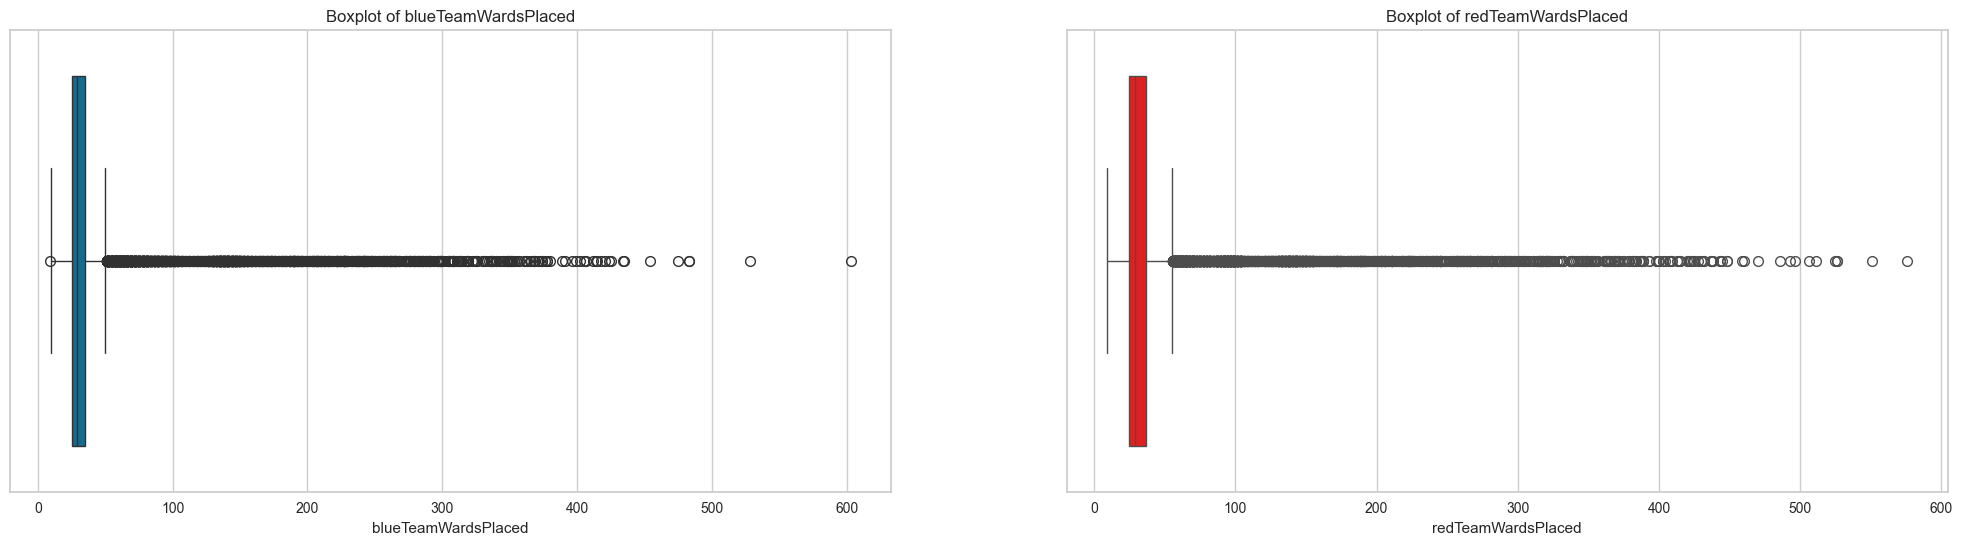

In [94]:
plt.figure(figsize=(25, 6))
plt.subplot(1,2,1)
sb.boxplot(x=df['blueTeamWardsPlaced'])
plt.title('Boxplot of blueTeamWardsPlaced')

plt.subplot(1,2,2)
sb.boxplot(x=df['redTeamWardsPlaced'], color='red')
plt.title('Boxplot of redTeamWardsPlaced')
plt.show()

The graphs show us that there are a lot of outliers, according to the IQR method. Therefore, we do not believe it is wise to delete every single outlier, so we will only delete outliers above 150 wards placed, based on the `mean` and `standard deviation`.

In [95]:
Q1 = df['blueTeamWardsPlaced'].quantile(0.25)
Q3 = df['blueTeamWardsPlaced'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

# Remove from red and blue team
outliers = df[(df['blueTeamWardsPlaced'] > upper_bound) | (df['redTeamWardsPlaced'] > upper_bound)]

print("Number of outliers from both teams: " + str(outliers['blueTeamWardsPlaced'].count()))

outliers[['blueTeamWardsPlaced', 'redTeamWardsPlaced']].describe()

Number of outliers from both teams: 6235


,blueTeamWardsPlaced,redTeamWardsPlaced
count,6235.000000,6235.000000
mean,78.278107,85.640417
std,73.428825,77.771134
min,13.000000,13.000000
25%,28.000000,30.000000
50%,54.000000,61.000000
75%,92.000000,101.000000
max,603.000000,576.000000


The common way of calculating outliers tells us that there are a lot of outliers and as the table shows, the maximum number of wards placed dropped drastically. We do not want lower the numbers that much, so we decided to calculate the 95th percentile and remove those.

In [96]:
# Calculate the 95th percentile for 'blueTeamWardsPlaced'
q_blue = df['blueTeamWardsPlaced'].quantile(0.95)

# Remove the top 15% of outliers from 'blueTeamWardsPlaced'
df = df[df['blueTeamWardsPlaced'] <= q_blue]

# Calculate the 95th percentile for 'redTeamWardsPlaced'
q_red = df['redTeamWardsPlaced'].quantile(0.95)

# Remove the top 15% of outliers from 'redTeamWardsPlaced'
df = df[df['redTeamWardsPlaced'] <= q_red]

df.describe()

,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamTotalKills,blueTeamDragonKills,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,blueTeamMinionsKilled,...,redTeamHeraldKills,redTeamTowersDestroyed,redTeamInhibitorsDestroyed,redTeamTurretPlatesDestroyed,redTeamMinionsKilled,redTeamJungleMinions,redTeamTotalGold,redTeamXp,redTeamTotalDamageToChamps,blueWin
count,21889.000000,21889.000000,21889.000000,21889.000000,21889.000000,21889.000000,21889.000000,21889.000000,21889.000000,21889.000000,...,21889.000000,21889.000000,21889.000000,21889.000000,21889.000000,21889.000000,21889.000000,21889.00000,21889.000000,21889.000000
mean,3.607383,32.766367,12.784138,0.734341,0.123030,0.651195,0.002010,8.905478,0.502536,349.327151,...,0.103203,0.953538,0.001690,3.877701,350.354653,88.626022,27790.878341,29616.93901,32140.930330,0.494632
std,2.021628,15.764000,4.910870,0.722137,0.328618,0.886306,0.054036,3.079682,0.500005,31.429227,...,0.304230,0.982945,0.046308,2.589159,31.574929,14.074764,2699.838449,1897.63872,6049.635667,0.499983
min,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,194.000000,...,0.000000,0.000000,0.000000,0.000000,188.000000,0.000000,18247.000000,17602.00000,10383.000000,0.000000
25%,2.000000,25.000000,9.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,329.000000,...,0.000000,0.000000,0.000000,2.000000,330.000000,80.000000,25916.000000,28387.00000,28001.000000,0.000000
50%,3.000000,28.000000,12.000000,1.000000,0.000000,0.000000,0.000000,9.000000,1.000000,350.000000,...,0.000000,1.000000,0.000000,4.000000,351.000000,88.000000,27635.000000,29630.00000,31911.000000,0.000000
75%,5.000000,34.000000,16.000000,1.000000,0.000000,1.000000,0.000000,11.000000,1.000000,371.000000,...,0.000000,1.000000,0.000000,5.000000,372.000000,98.000000,29515.000000,30862.00000,36019.000000,1.000000
max,37.000000,133.000000,38.000000,2.000000,2.000000,10.000000,2.000000,21.000000,1.000000,465.000000,...,1.000000,10.000000,2.000000,15.000000,464.000000,156.000000,41227.000000,36797.00000,62452.000000,1.000000


So if we show the graphs again...

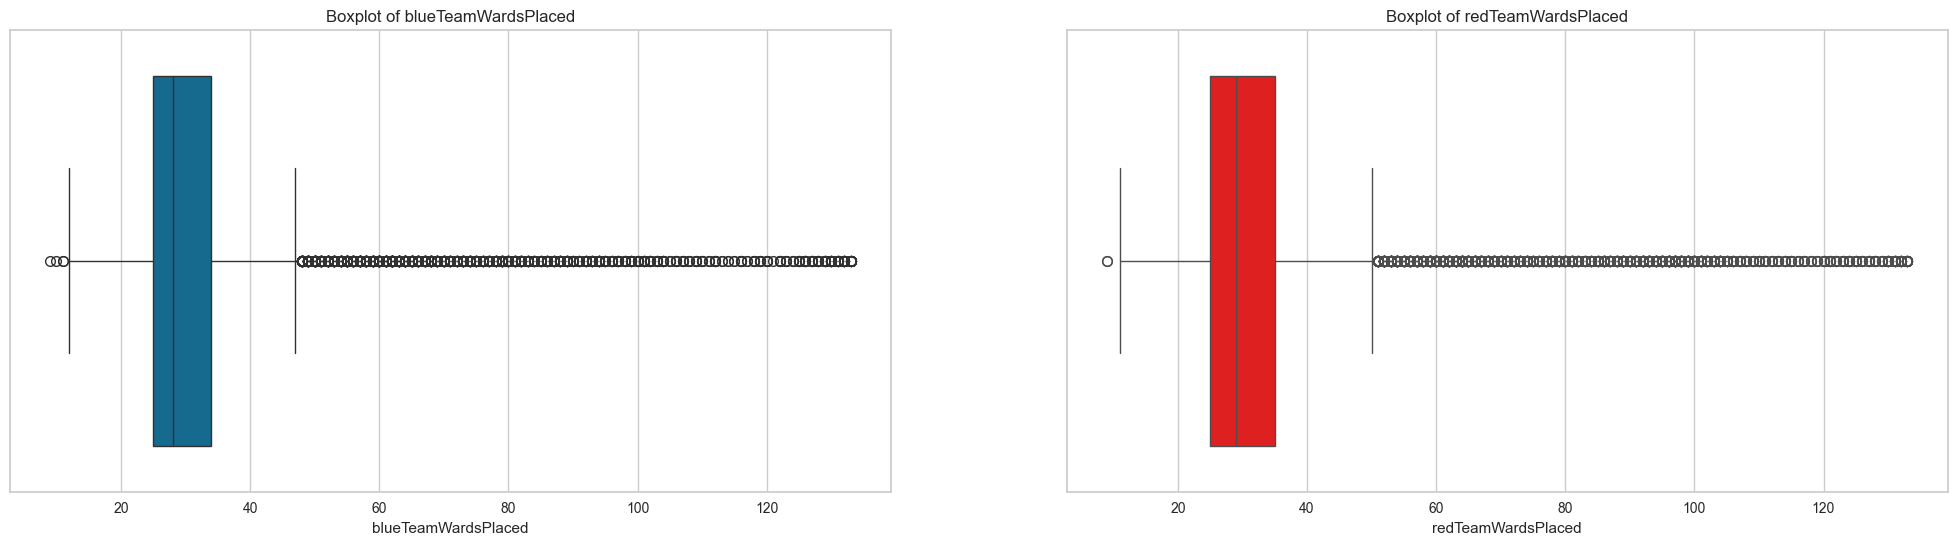

,blueTeamWardsPlaced,redTeamWardsPlaced
count,21889.000000,21889.000000
mean,32.766367,34.572388
std,15.764000,18.509073
min,9.000000,9.000000
25%,25.000000,25.000000
50%,28.000000,29.000000
75%,34.000000,35.000000
max,133.000000,133.000000


In [97]:
plt.figure(figsize=(25, 6))
plt.subplot(1,2,1)
sb.boxplot(x=df['blueTeamWardsPlaced'])
plt.title('Boxplot of blueTeamWardsPlaced')

plt.subplot(1,2,2)
sb.boxplot(x=df['redTeamWardsPlaced'], color='red')
plt.title('Boxplot of redTeamWardsPlaced')
plt.show()

df[['blueTeamWardsPlaced', 'redTeamWardsPlaced']].describe()

The `count` value has decreased circa 2400 lines after removing these outliers.

### Data Analysis

Let's now analyze the different features based on the match result, the latter represented by `blueWin`.

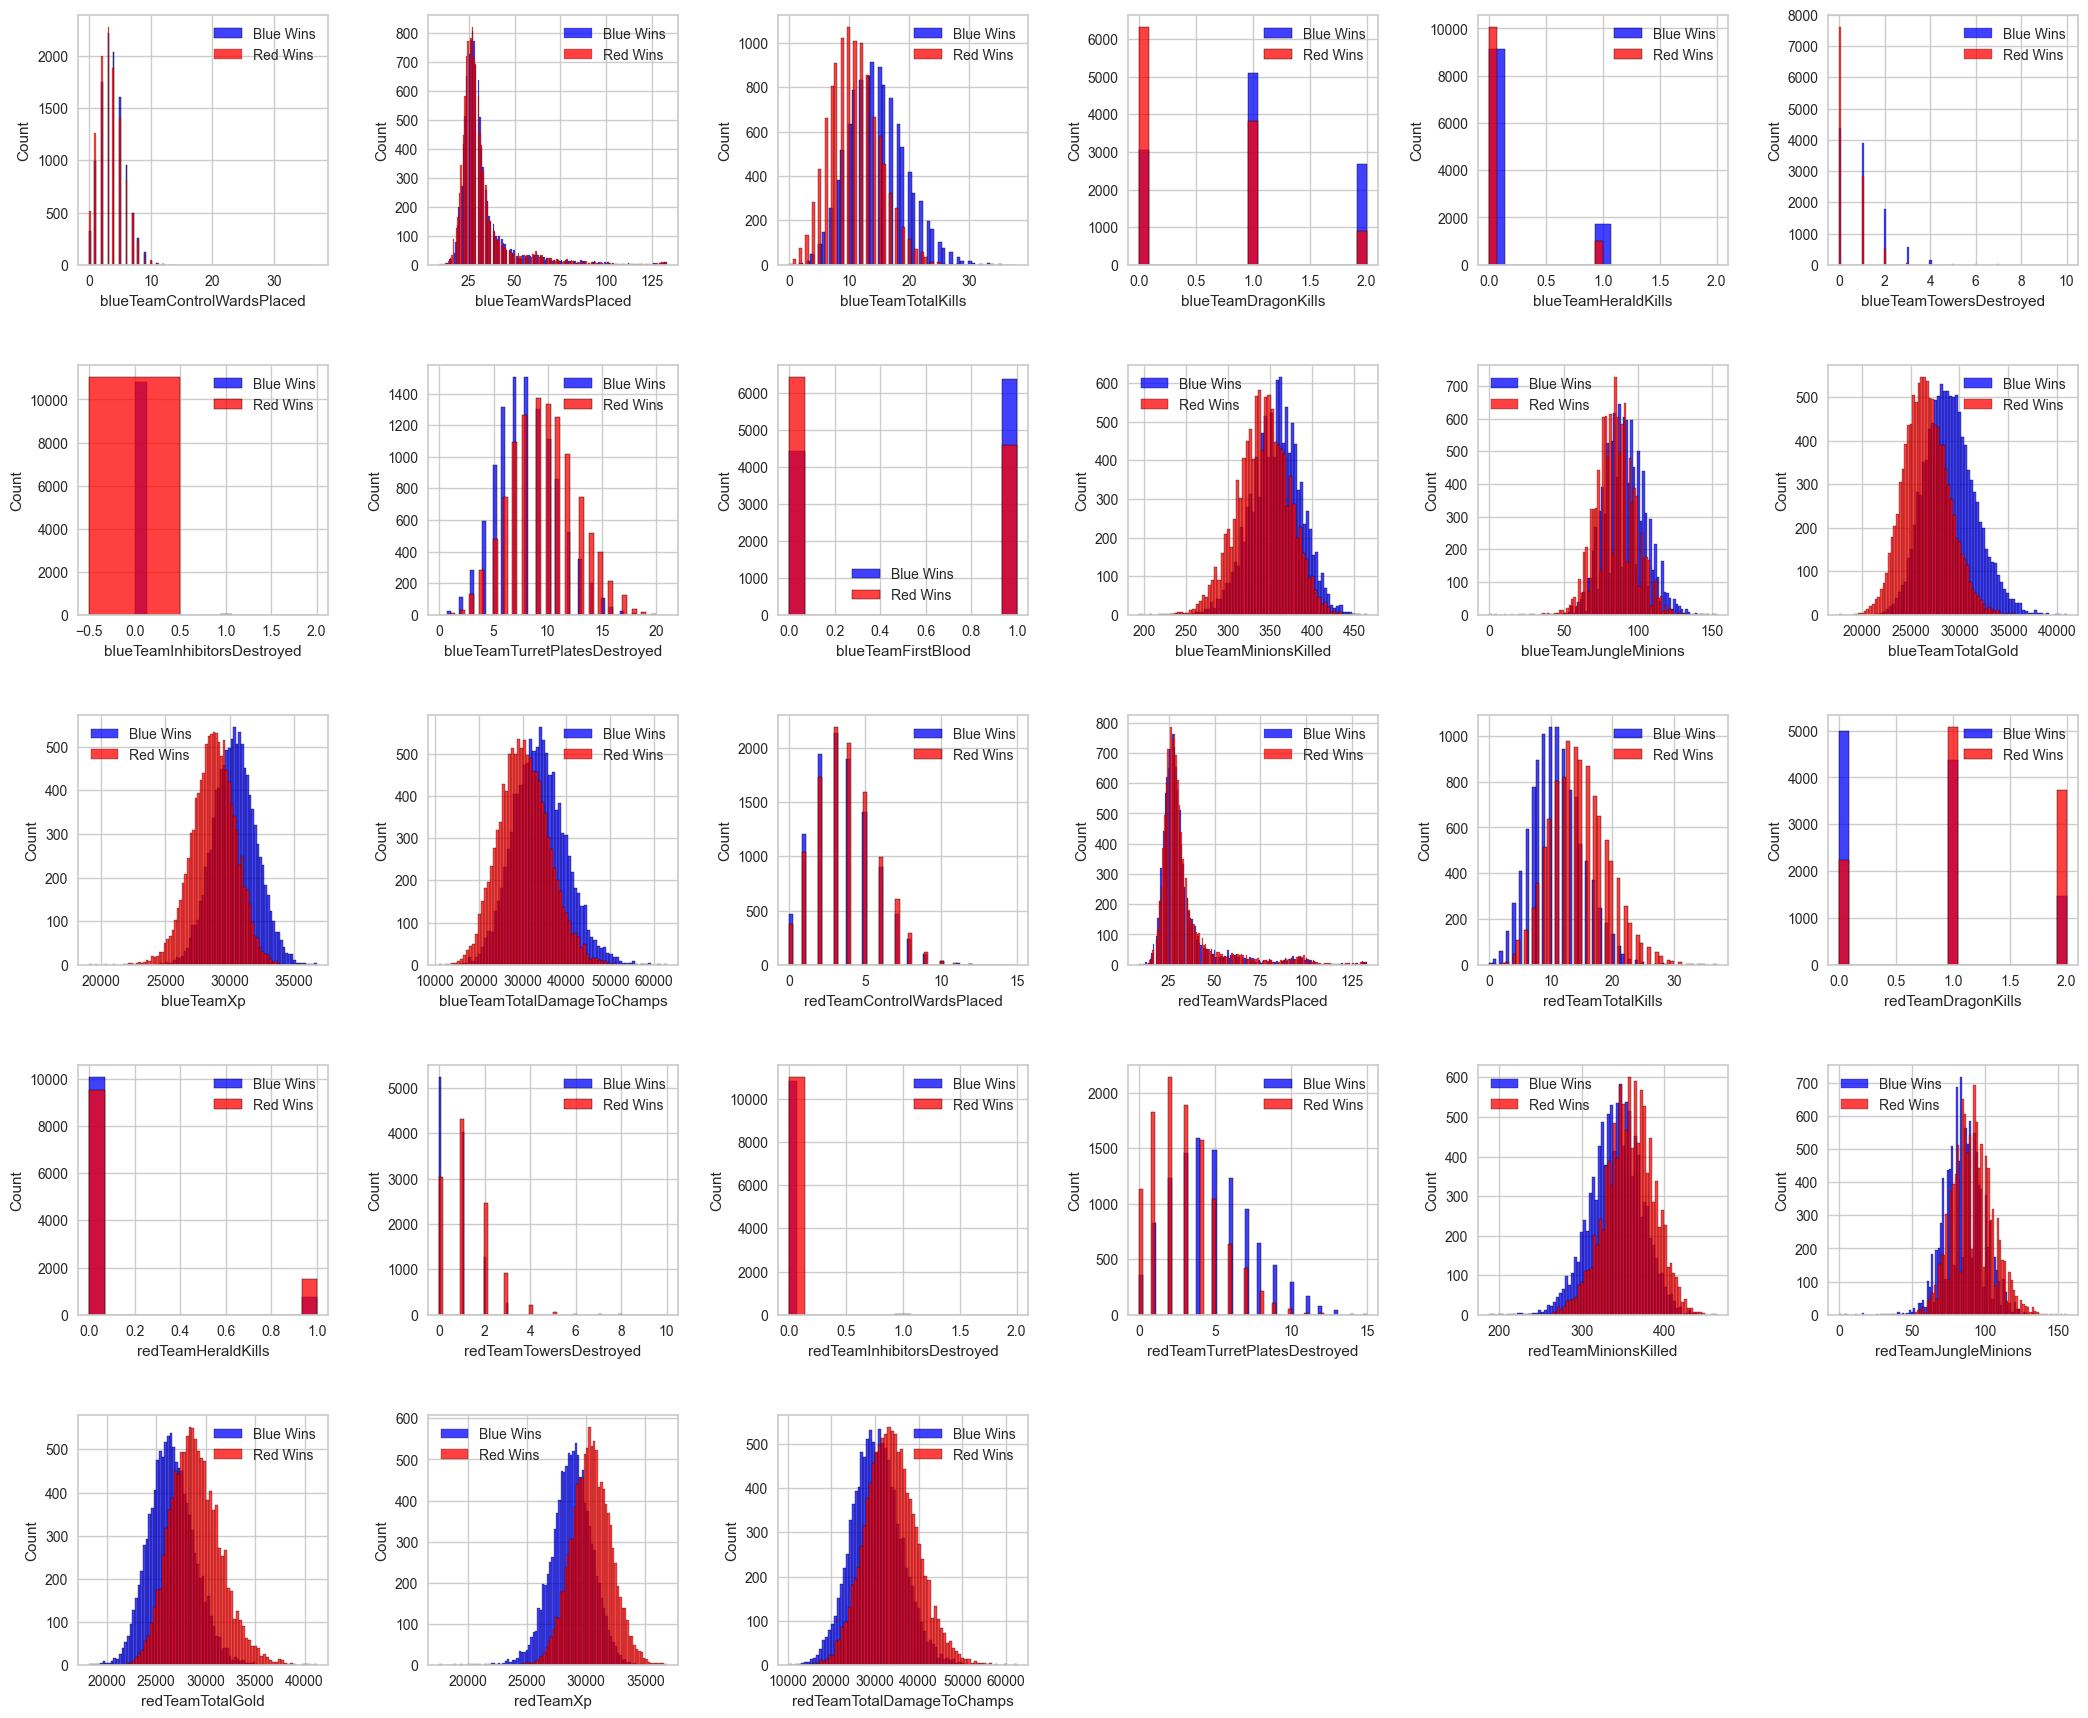

In [98]:
plt.figure(figsize=(25,25))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

dfBlueWins = df[df['blueWin']==1].drop(['blueWin'],axis=1)
dfRedWins = df[df['blueWin']==0].drop(['blueWin'],axis=1)

cols = list(dfBlueWins.columns)

for i, col in enumerate(cols):
    plt.subplot(6,6,i+1)
    sb.histplot(data=dfBlueWins[col], color='blue', label = 'Blue Wins', kde=False)
    sb.histplot(data=dfRedWins[col], color='red', label = 'Red Wins', kde=False)
    _,axes = plt.gca().get_legend_handles_labels()
    plt.legend(axes,prop={'size': 10})

plt.show()

The graphs displayed make sense. When the blue team has more of some statistic, they usually win and vice-versa. The only graphic that may be weird to a person that does not know how the game works is `TurretPlatesDestroyed` ones. When the team destroys more plates, the winning count for that team starts decreasing.
Due to the fact that, for example, `ward` related statistics do not influence the game that much, as seen in the graphs, we will calculate the correlation between the winning team and the features. 

<Axes: >

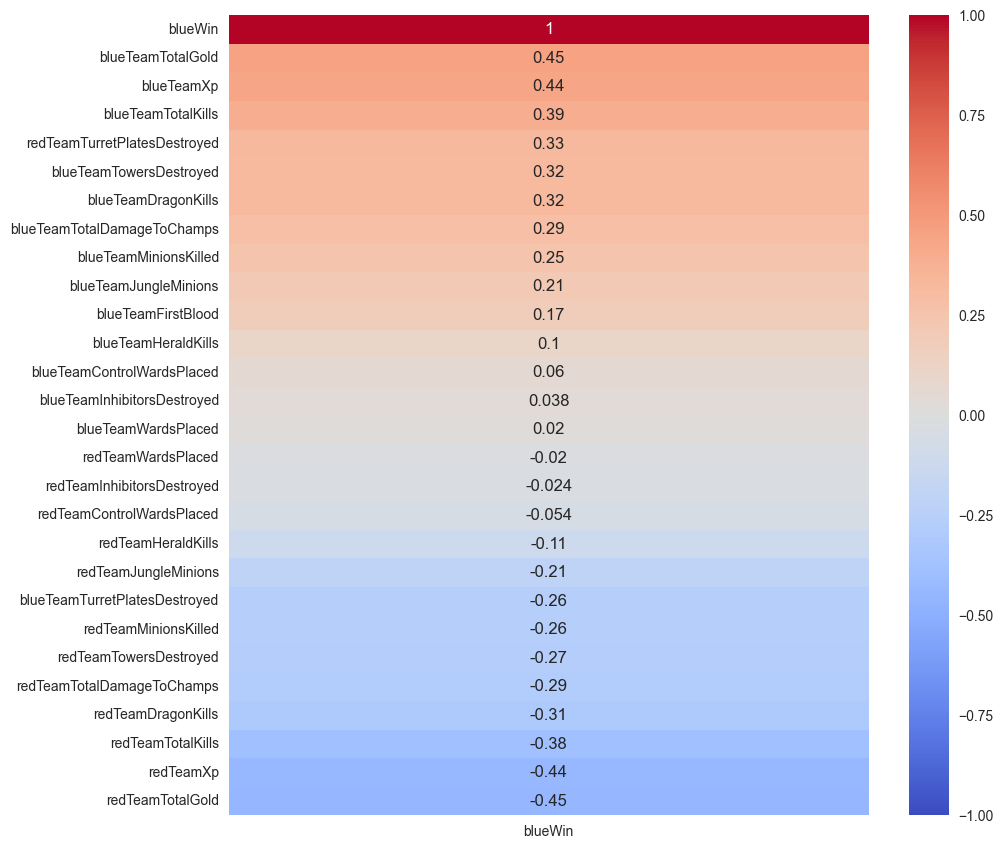

In [99]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

corr = df.corr()[['blueWin']].sort_values(by='blueWin', ascending=False)
sb.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

As we suspected before, there was something wrong with the `TeamTurretPlatesDestroyed` columns. We initially added the columns as they were in the website, but based on the graphs and the fact that the `blueTeamTurretPlatesDestroyed` is influencing a win for the Red team and vice-versa, we believe that the columns may be swapped.

<Axes: >

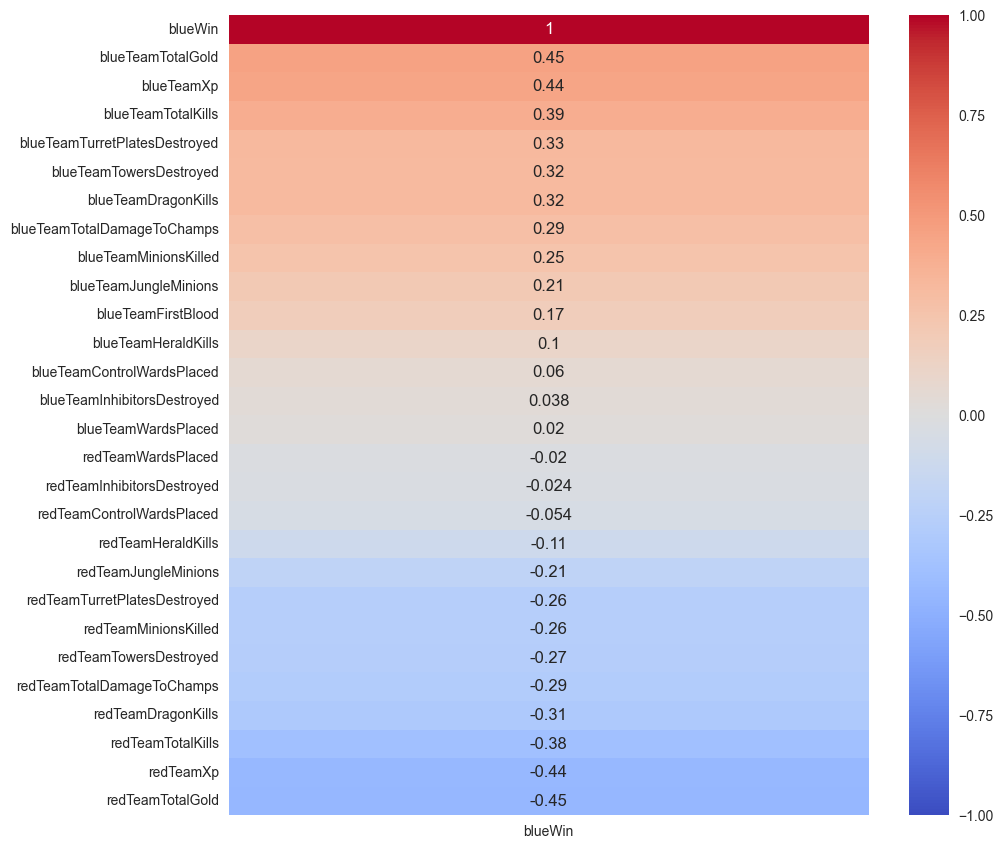

In [100]:
# Swap the blueTeamTurretPlatesDestroyed and redTeamTurretPlatesDestroyed columns
df['blueTeamTurretPlatesDestroyed'], df['redTeamTurretPlatesDestroyed'] = df['redTeamTurretPlatesDestroyed'], df['blueTeamTurretPlatesDestroyed']

plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

corr = df.corr()[['blueWin']].sort_values(by='blueWin', ascending=False)
sb.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

The correlation heatmap now makes much more sense.

### Feature Extraction

We will now calculate the correlation between features and see if we can reduce the number of columns of the dataset. The objective of feature extraction is to remove the total number of columns by grouping related columns together. Therefore, we will calculate the features that have over 75% correlation between them. We started on 95%, but the highest correlation between features in our dataset was 85%, so we decided to lower the percentage.

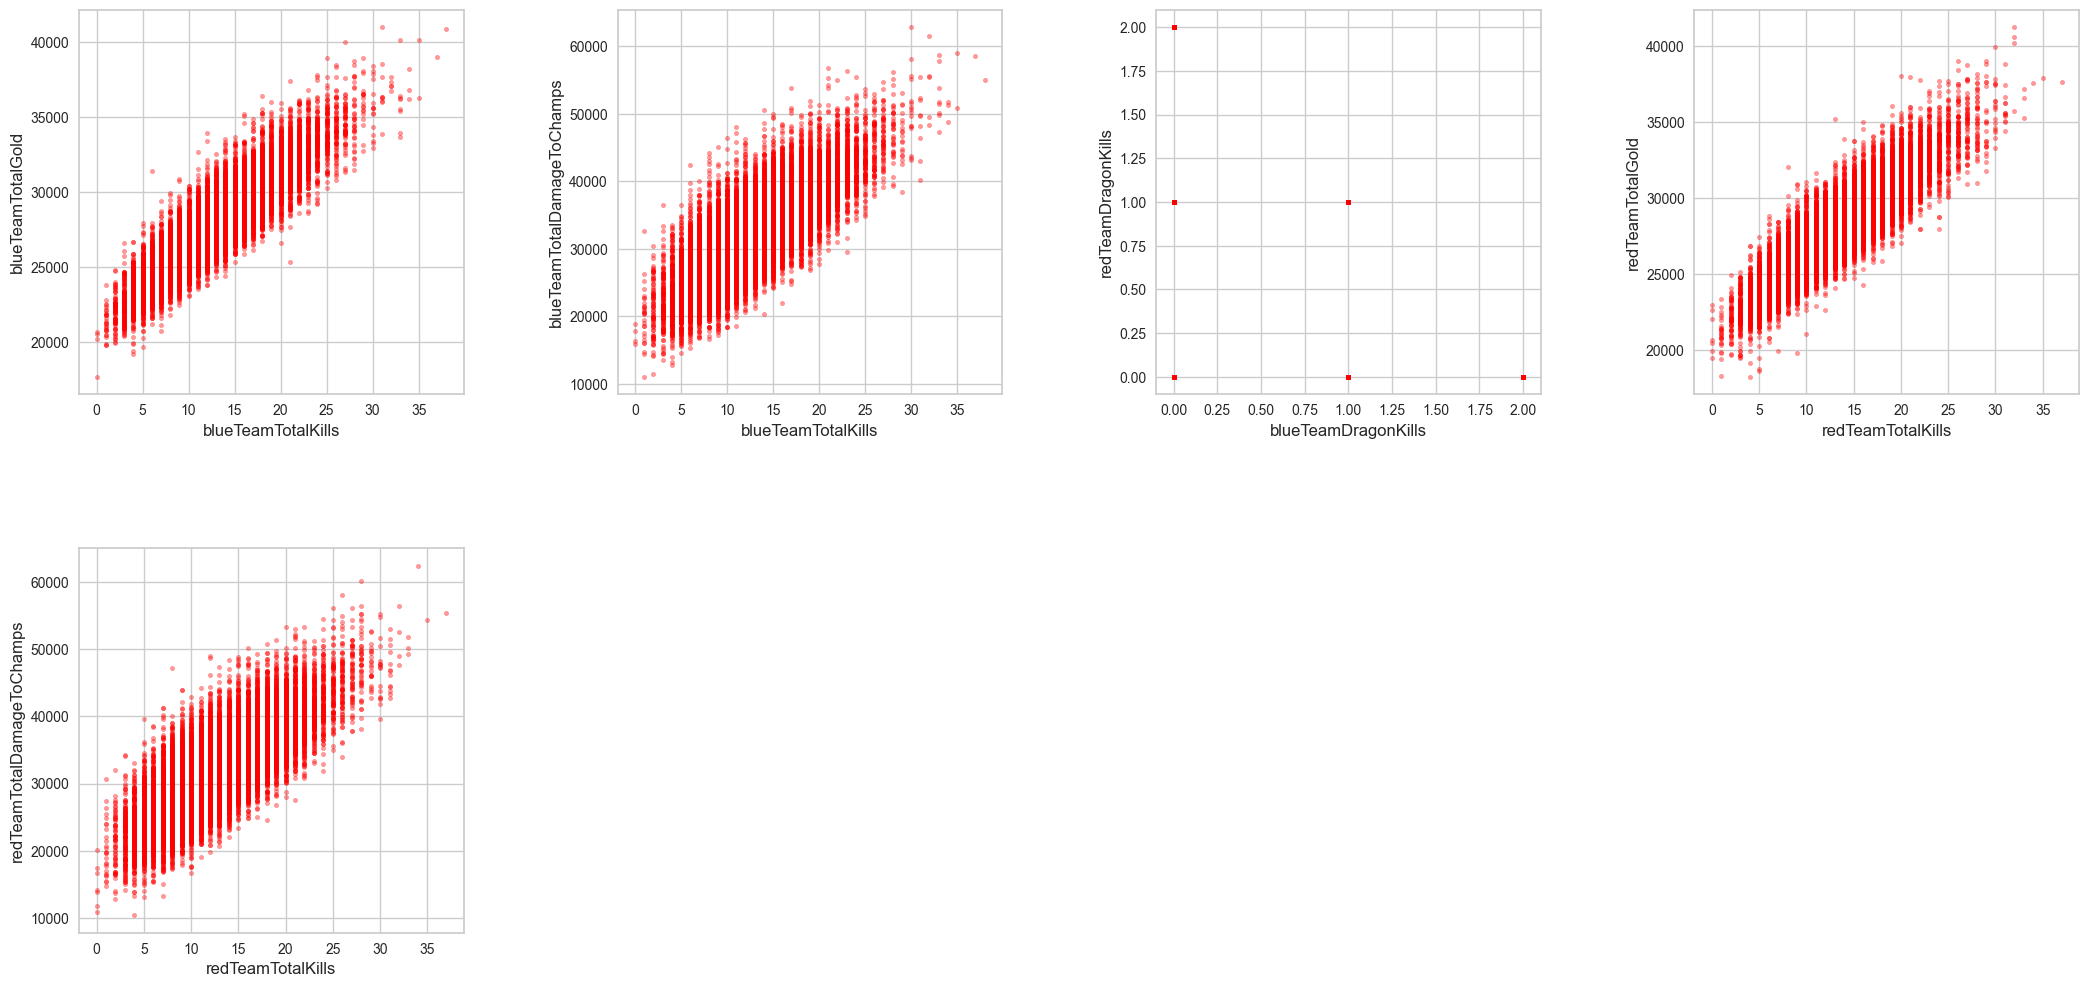

In [101]:
cols = list(df.columns)

plot_cols = []

for i, col1 in enumerate(cols):
    if col1 == 'blueWin':
        continue
    for col2 in cols[i::]:
        if col1 == col2 or col2 == 'blueWin':
            continue
        if math.fabs(df[col1].corr(df[col2])) > 0.75:
            plot_cols.append([col1,col2])

# Plot the cols with high correlation

plt.figure(figsize=(25,25))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

for i, cols in enumerate(plot_cols):
    plt.subplot(4,4,i+1)
    plt.scatter(df[cols[0]],df[cols[1]],s=10,c='red',alpha=0.4)
    plt.xlabel(f"{cols[0]}",fontsize=12)
    plt.ylabel(f"{cols[1]}",fontsize=12)

### Extracting the high correlation features

We will replace the the highly correlated features from the same team with a ratio between them, as this should accurately represent what both features do. We were going to be utilizing the "replace" function to avoid division by zero, which could ruin the further calculations in the set, however, we decided that this would be not representative of games without kills, and thus instead merely set this new feature to 0 when there are 0 kills for a team, which mitigates the effect of damage on the victory calculations, but since kills are not only a higher win-correlation feature, and damage does not, by itself, grant a winning condition, only by leading into kills, this approximation is acceptable. <br><br>
For the gold per kill feature, the opposite is believed, even if there are no kills, the effect of gold should not be mitigated, and such the kills should be considered one, that way the feature is as if it was the original total gold counter.

In [102]:
df_copy = df.copy()

df_copy['blueTeamDamagePerKill'] = df_copy['blueTeamTotalDamageToChamps'] / df_copy['blueTeamTotalKills']
df_copy['redTeamDamagePerKill'] = df_copy['redTeamTotalDamageToChamps'] / df_copy['redTeamTotalKills']

df_copy['blueTeamDamagePerKill'] = df_copy['blueTeamDamagePerKill'].replace(np.inf, 0)
df_copy['redTeamDamagePerKill'] = df_copy['redTeamDamagePerKill'].replace(np.inf, 0)

df_copy['blueTeamGoldPerKill'] = df_copy['blueTeamTotalGold']/df_copy['blueTeamTotalKills'].replace(0,1)
df_copy['redTeamGoldPerKill'] = df_copy['redTeamTotalGold']/df_copy['redTeamTotalKills'].replace(0,1)
df_copy['blueTeamDragonAdvantage'] = df_copy['blueTeamDragonKills'] - df_copy['redTeamDragonKills']


df_copy = df_copy.drop(columns=['blueTeamTotalDamageToChamps','redTeamTotalDamageToChamps','blueTeamTotalGold','redTeamTotalGold', 'blueTeamTotalKills', 'redTeamTotalKills', 'blueTeamDragonKills', 'redTeamDragonKills'])

df_copy.head()

,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,blueTeamMinionsKilled,blueTeamJungleMinions,blueTeamXp,...,redTeamTurretPlatesDestroyed,redTeamMinionsKilled,redTeamJungleMinions,redTeamXp,blueWin,blueTeamDamagePerKill,redTeamDamagePerKill,blueTeamGoldPerKill,redTeamGoldPerKill,blueTeamDragonAdvantage
0,2,23,0,0,0,1,0,388,106,29798,...,7,400,94,32613,1,5460.500000,1702.437500,5980.750000,1852.312500,2
1,2,46,0,1,0,4,0,348,98,30530,...,10,373,76,30320,0,2984.750000,2152.058824,2321.000000,1704.117647,1
3,3,28,1,1,0,5,1,355,84,30466,...,9,378,87,31069,0,3917.250000,2822.900000,3416.625000,2515.700000,-1
4,3,30,1,1,0,5,0,370,100,31066,...,7,382,96,29475,1,2425.090909,2749.285714,2524.727273,3721.714286,0
5,2,24,0,0,0,3,0,369,80,26872,...,16,357,70,30422,0,7471.333333,2064.466667,8003.666667,1891.200000,-2


We can do the correlation calculations in this new dataframe, and notice that there are no more or any new highly correlated features.

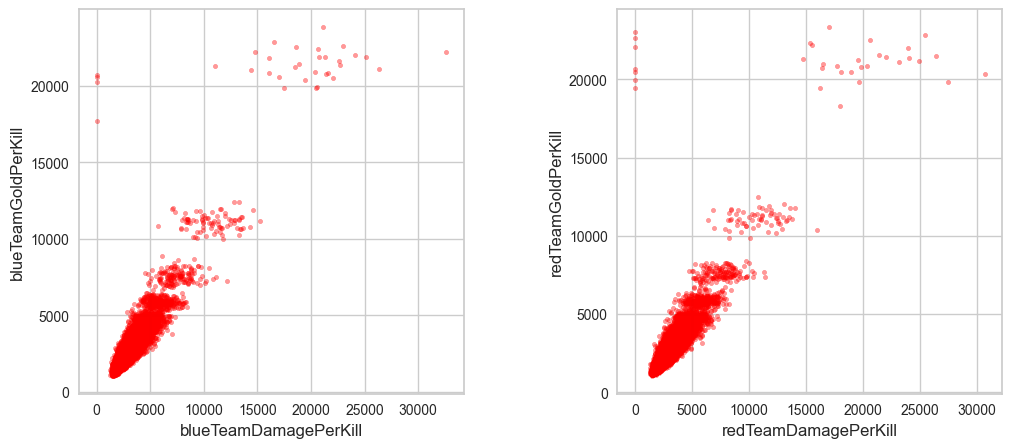

In [103]:
cols = list(df_copy.columns)

plot_cols = []

for i, col1 in enumerate(cols):
    if col1 == 'blueWin':
        continue
    for col2 in cols[i::]:
        if col1 == col2 or col2 == 'blueWin':
            continue
        if math.fabs(df_copy[col1].corr(df_copy[col2])) > 0.75:
            plot_cols.append([col1,col2])

# Plot the cols with high correlation

plt.figure(figsize=(25,25))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

for i, cols in enumerate(plot_cols):
    plt.subplot(4,4,i+1)
    plt.scatter(df_copy[cols[0]],df_copy[cols[1]],s=10,c='red',alpha=0.4)
    plt.xlabel(f"{cols[0]}",fontsize=12)
    plt.ylabel(f"{cols[1]}",fontsize=12)

We can notice here that the newly calculated features also correlate among eachother, these two new features can be further simplified into "TeamGoldPerDamage", which correlates way better to the fact HP per character varies.

In [104]:
df_final = df_copy.copy()

df_final['blueTeamGoldPerDamage'] = df_final['blueTeamGoldPerKill']/df_final['blueTeamDamagePerKill'].replace(0,1)
df_final['redTeamGoldPerDamage'] = df_final['redTeamGoldPerKill']/df_final['redTeamDamagePerKill'].replace(0,1)

df_final = df_final.drop(columns=['blueTeamGoldPerKill','redTeamGoldPerKill','blueTeamDamagePerKill','redTeamDamagePerKill'])

df_final.head()

,blueTeamControlWardsPlaced,blueTeamWardsPlaced,blueTeamHeraldKills,blueTeamTowersDestroyed,blueTeamInhibitorsDestroyed,blueTeamTurretPlatesDestroyed,blueTeamFirstBlood,blueTeamMinionsKilled,blueTeamJungleMinions,blueTeamXp,...,redTeamTowersDestroyed,redTeamInhibitorsDestroyed,redTeamTurretPlatesDestroyed,redTeamMinionsKilled,redTeamJungleMinions,redTeamXp,blueWin,blueTeamDragonAdvantage,blueTeamGoldPerDamage,redTeamGoldPerDamage
0,2,23,0,0,0,1,0,388,106,29798,...,2,0,7,400,94,32613,1,2,1.095275,1.088036
1,2,46,0,1,0,4,0,348,98,30530,...,1,0,10,373,76,30320,0,1,0.777620,0.791855
3,3,28,1,1,0,5,1,355,84,30466,...,0,0,9,378,87,31069,0,-1,0.872200,0.891176
4,3,30,1,1,0,5,0,370,100,31066,...,1,0,7,382,96,29475,1,0,1.041086,1.353702
5,2,24,0,0,0,3,0,369,80,26872,...,3,0,16,357,70,30422,0,-2,1.071250,0.916072


Now let's see if there are any more correlations.

In [105]:
cols = list(df_final.columns)

plot_cols = []

for i, col1 in enumerate(cols):
    if col1 == 'blueWin':
        continue
    for col2 in cols[i::]:
        if col1 == col2 or col2 == 'blueWin':
            continue
        if math.fabs(df_final[col1].corr(df_final[col2])) > 0.75:
            plot_cols.append([col1,col2])

# Plot the cols with high correlation

plt.figure(figsize=(25,25))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

for i, cols in enumerate(plot_cols):
    plt.subplot(4,4,i+1)
    plt.scatter(df_final[cols[0]],df_final[cols[1]],s=10,c='red',alpha=0.4)
    plt.xlabel(f"{cols[0]}",fontsize=12)
    plt.ylabel(f"{cols[1]}",fontsize=12)

<Figure size 2500x2500 with 0 Axes>

Now let's see if our created features correlate to the team's win well.

<Axes: >

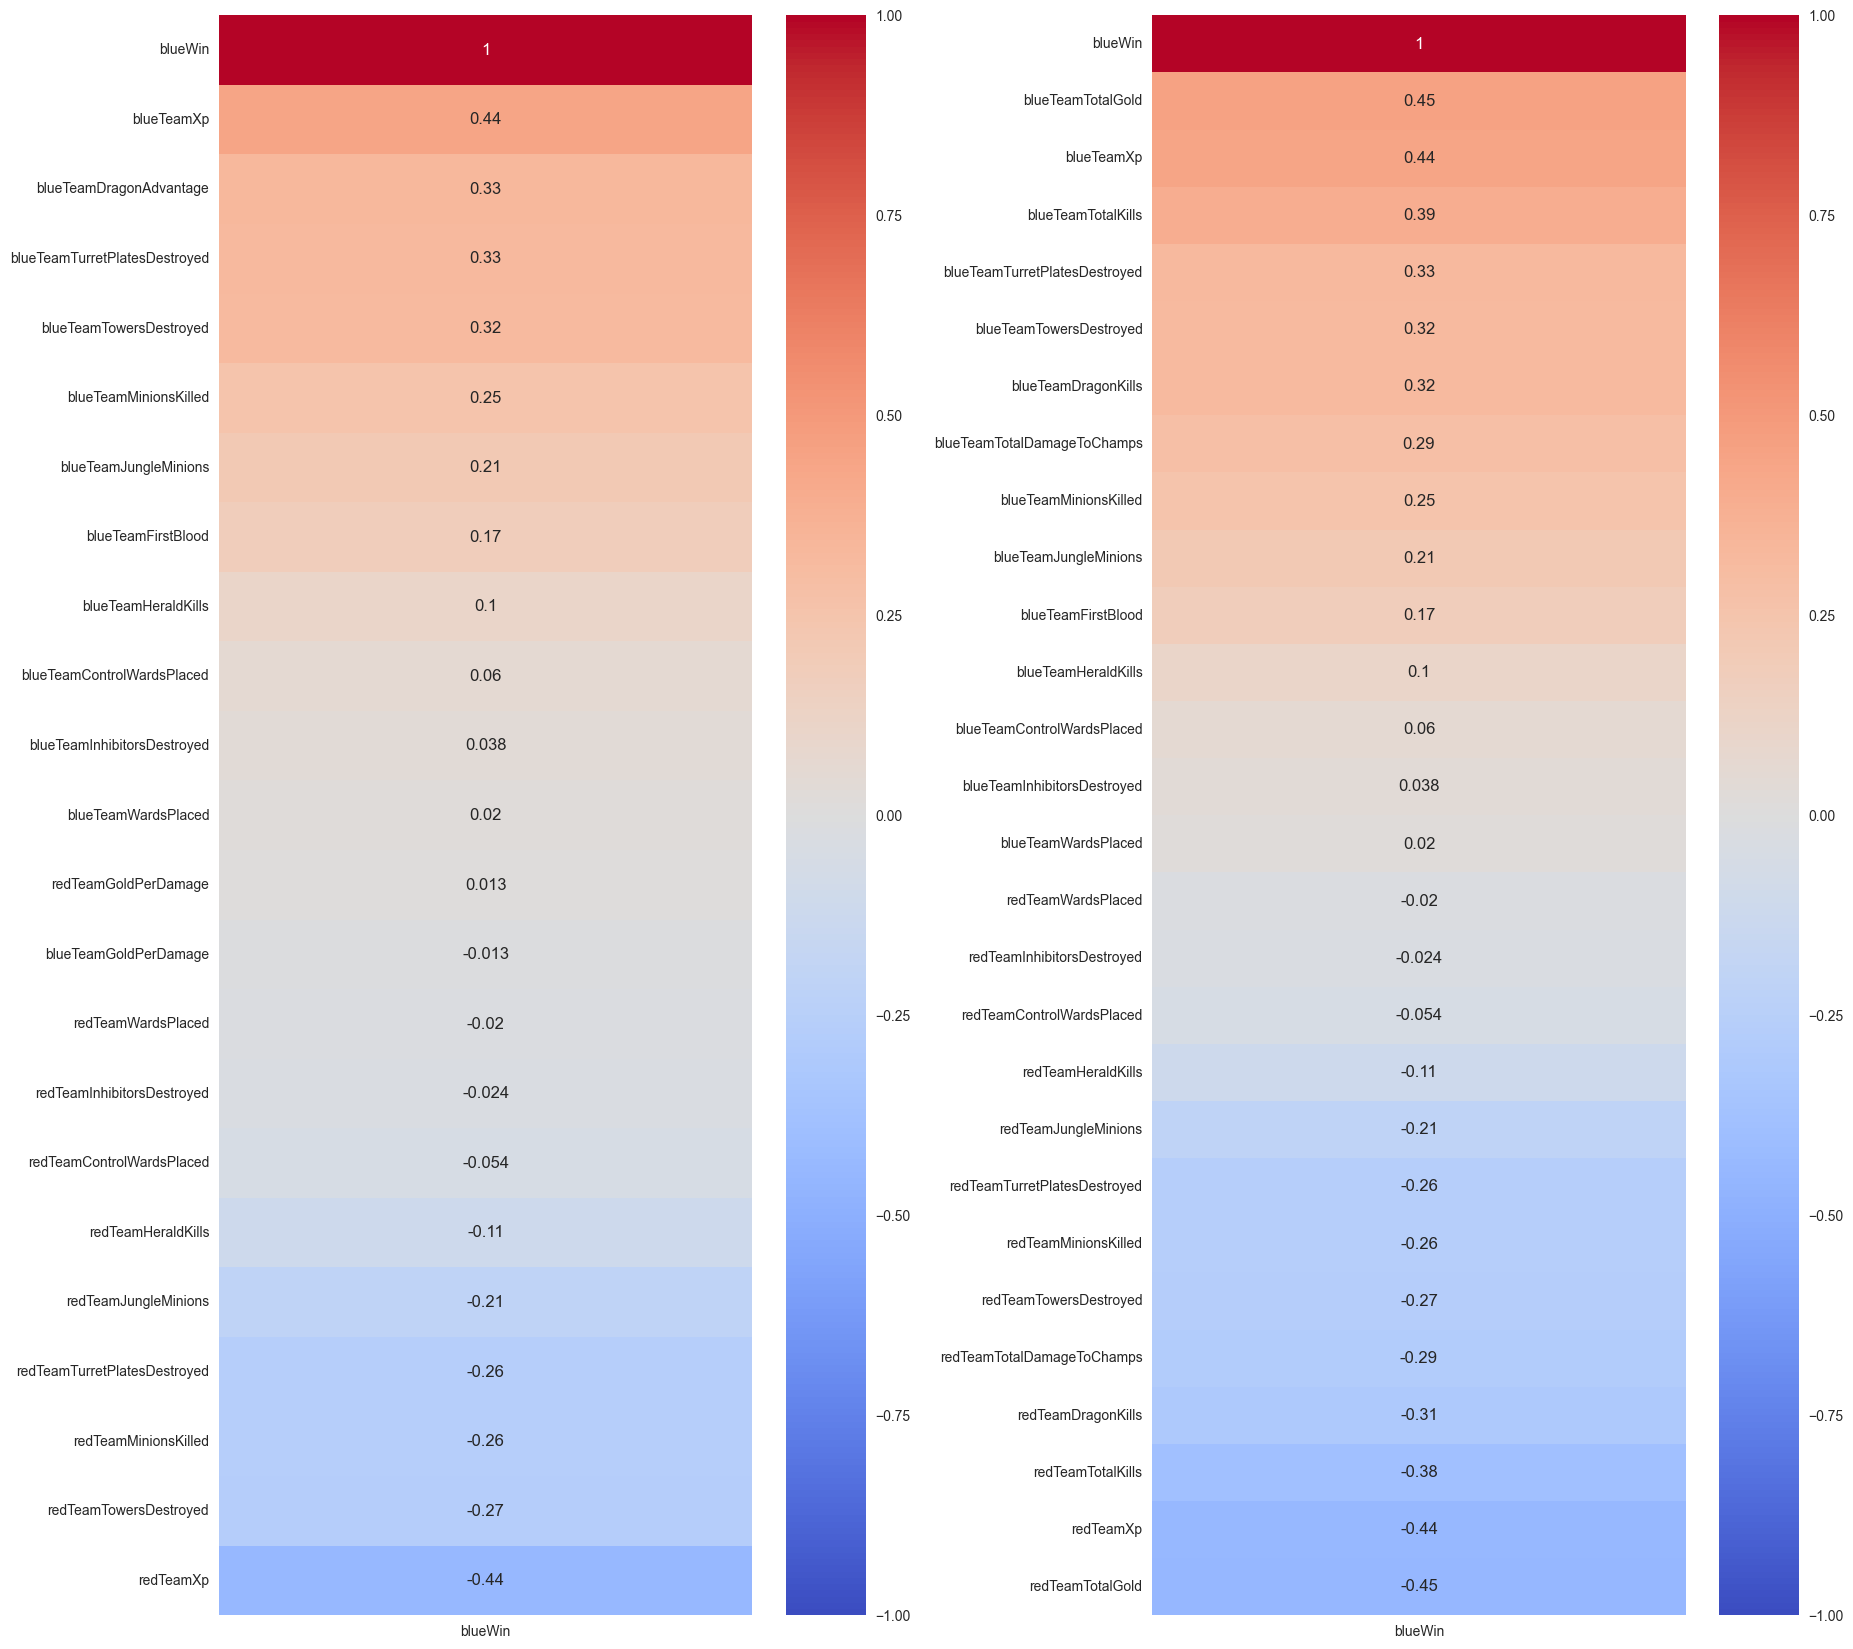

In [106]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

plt.subplot(1,2,1)

corr = df_final.corr()[['blueWin']].sort_values(by='blueWin', ascending=False)
sb.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.subplot(1,2,2)

corr = df.corr()[['blueWin']].sort_values(by='blueWin', ascending=False)
sb.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

We can see in the above heatmaps that the newly calculated features, for some reason, seem to favor the opposite team, which is nonsensical, as before they correctly favored their own team's victory. This may be because, due to how the game works, there are characters that can take a lot more damage before they actually die, if they die at all, and sometimes, a character with all this HP will take a lot of damage and also be the reason why that team wins, so, despite the correlation graphs indicating a connection, there is no way we can make said connection without it wrongly grouping games. <br> <br>
However, we will still try both with and without the new features, in order to compare the actual effectiveness of this feature extraction. <br>
For the gold per kill feature, which was previously extracted, a similar logic applies, if a team is losing, the enemy team players gain a "bounty", which makes them more rewarding to kill, thus, each kill we be individually worth more if you are losing, which may lead to this discrepancy.

### Feature Extraction - Removal
Faced with these mediocre feature extractions, the other possible path to take is to remove one of the highly correlated features, and the decision is rather obvious. Gold in this game is directly linked to how many minions you kill and how many kills you have, thus, it makes sense that, when these features are highly correlated, you could just remove the variables which vary the the gold gain, as they will be naturally already reflected in the total gold of a team. <br> <br>
For this purpose, we'll get rid of the total kills counter for both teams, which was the common factor in both high correlation cases. <br><br>
We also get rid of the "MinionsKilled" counter for each team as, despite not being a highly correlated feature, is also directly reflected in the gold count, and does not add any relevant info that isn't already given by the gold count. The reason why it isn't a highly correlated feature is, since gold gain is mostly composed of minions killed and champions killed, the other removed feature, the "amount of correlation" is shared among those two features, and thus it only indicates that champions killed tend to contribute more gold to the team than the minions do.

In [107]:
df_removed = df.copy()

df_removed['blueDragonAdvantage'] = df_removed['blueTeamDragonKills'] - df_removed['redTeamDragonKills']
df_removed = df_removed.drop(columns=['blueTeamTotalKills', 'redTeamTotalKills', 'blueTeamDragonKills', 'redTeamDragonKills', 'blueTeamMinionsKilled', 'redTeamMinionsKilled'])

cols = list(df_removed.columns)

plot_cols = []

for i, col1 in enumerate(cols):
    if col1 == 'blueWin':
        continue
    for col2 in cols[i::]:
        if col1 == col2 or col2 == 'blueWin':
            continue
        if math.fabs(df_removed[col1].corr(df_removed[col2])) > 0.75:
            plot_cols.append([col1,col2])

# Plot the cols with high correlation

plt.figure(figsize=(25,25))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

for i, cols in enumerate(plot_cols):
    plt.subplot(4,4,i+1)
    plt.scatter(df_removed[cols[0]],df_removed[cols[1]],s=10,c='red',alpha=0.4)
    plt.xlabel(f"{cols[0]}",fontsize=12)
    plt.ylabel(f"{cols[1]}",fontsize=12)

<Figure size 2500x2500 with 0 Axes>

There are no more highly correlated features in this set, and the correlations remain the same as the original, with the exception of the added "blueTeamDragonAdvantage" feature, which hasn't proved to be a bad choice in either attempt at feature extraction. Thus, we shall test how effective this extraction is when we score the algorithms.

## Training the Models

Best model for Original DF:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')



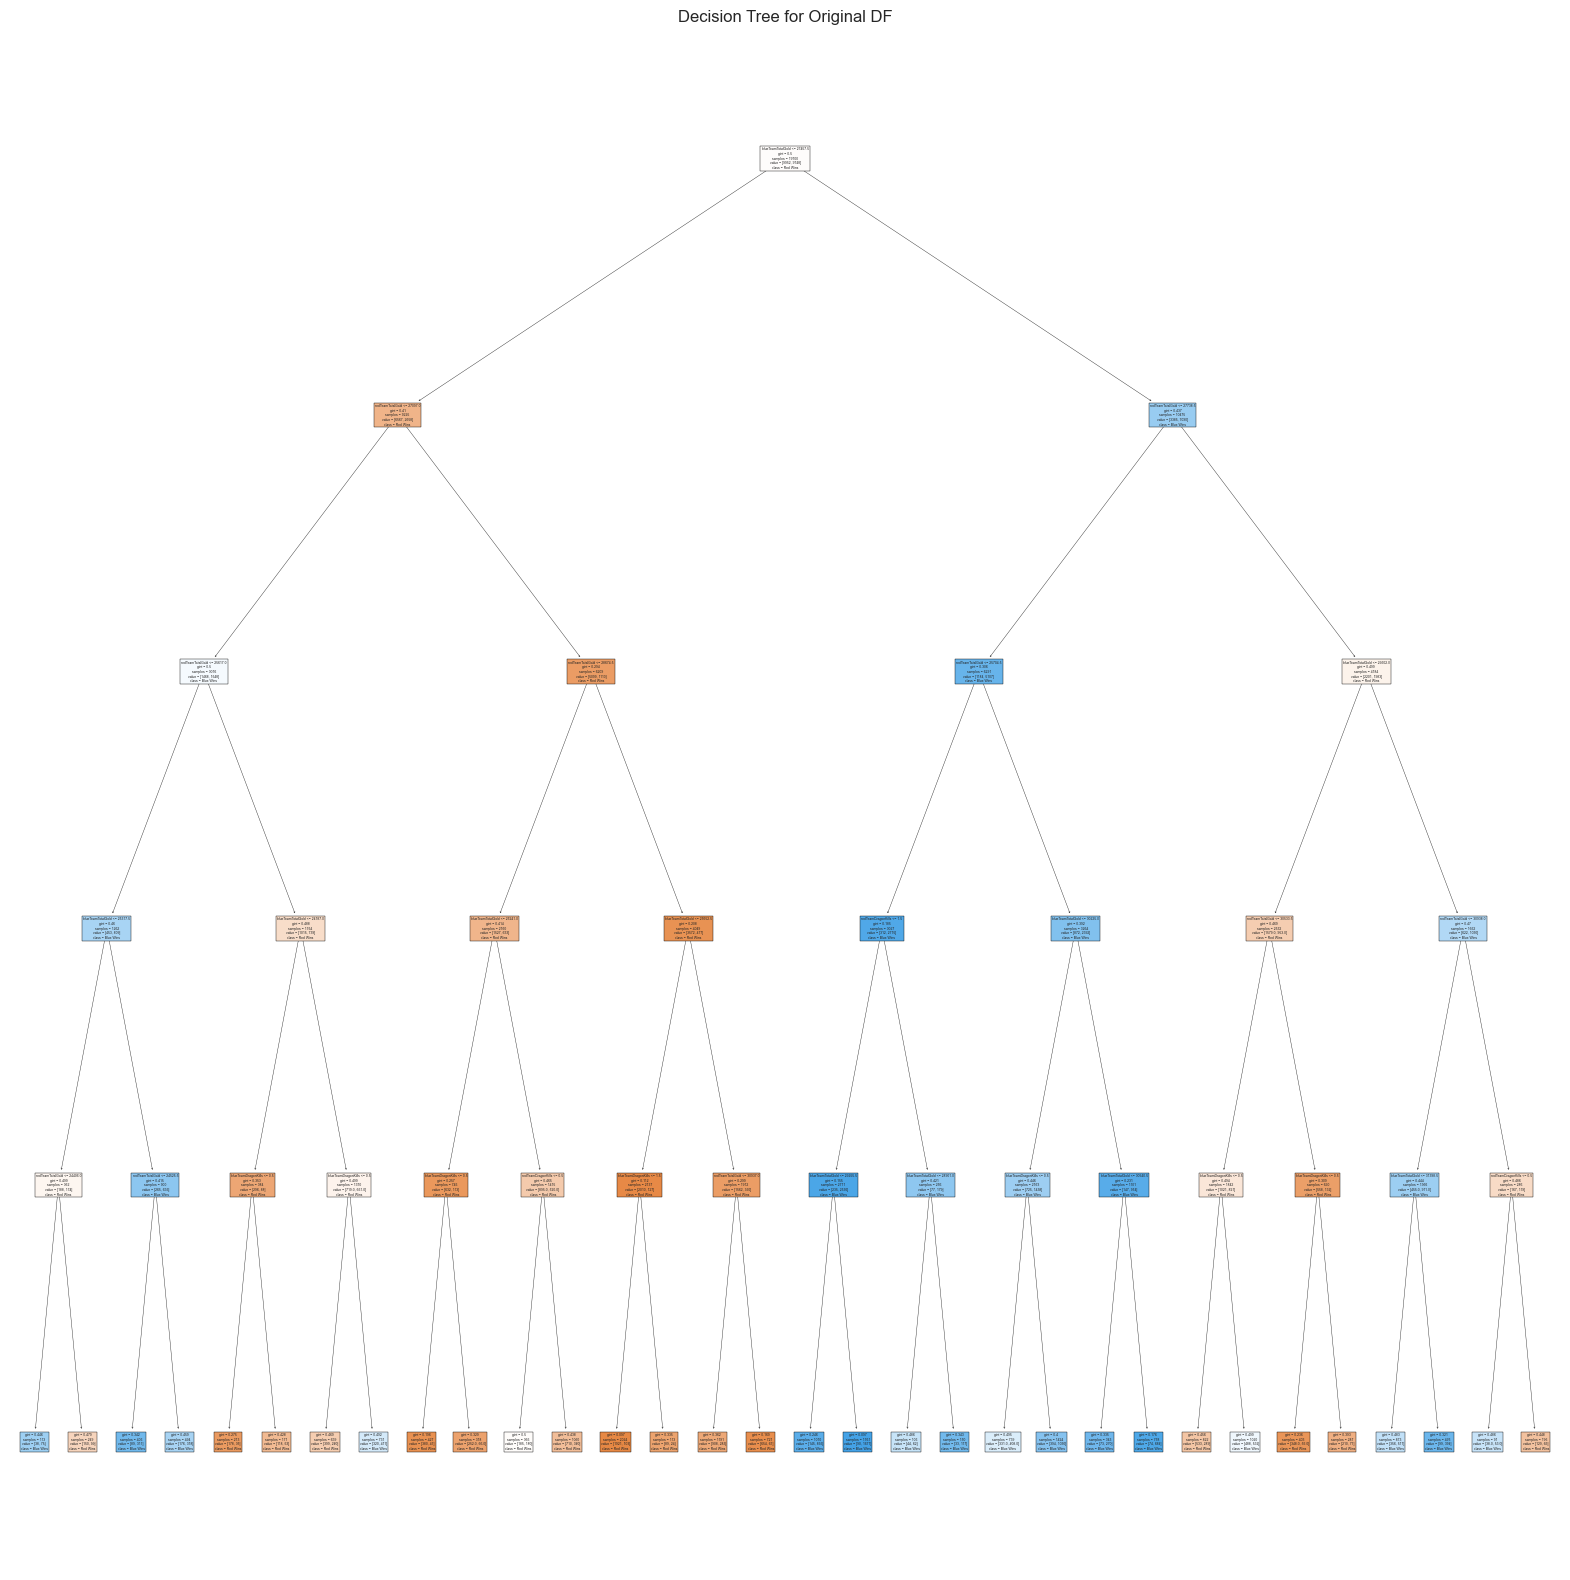

Accuracy for Original DF: 0.74

Best model for FE DF:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')



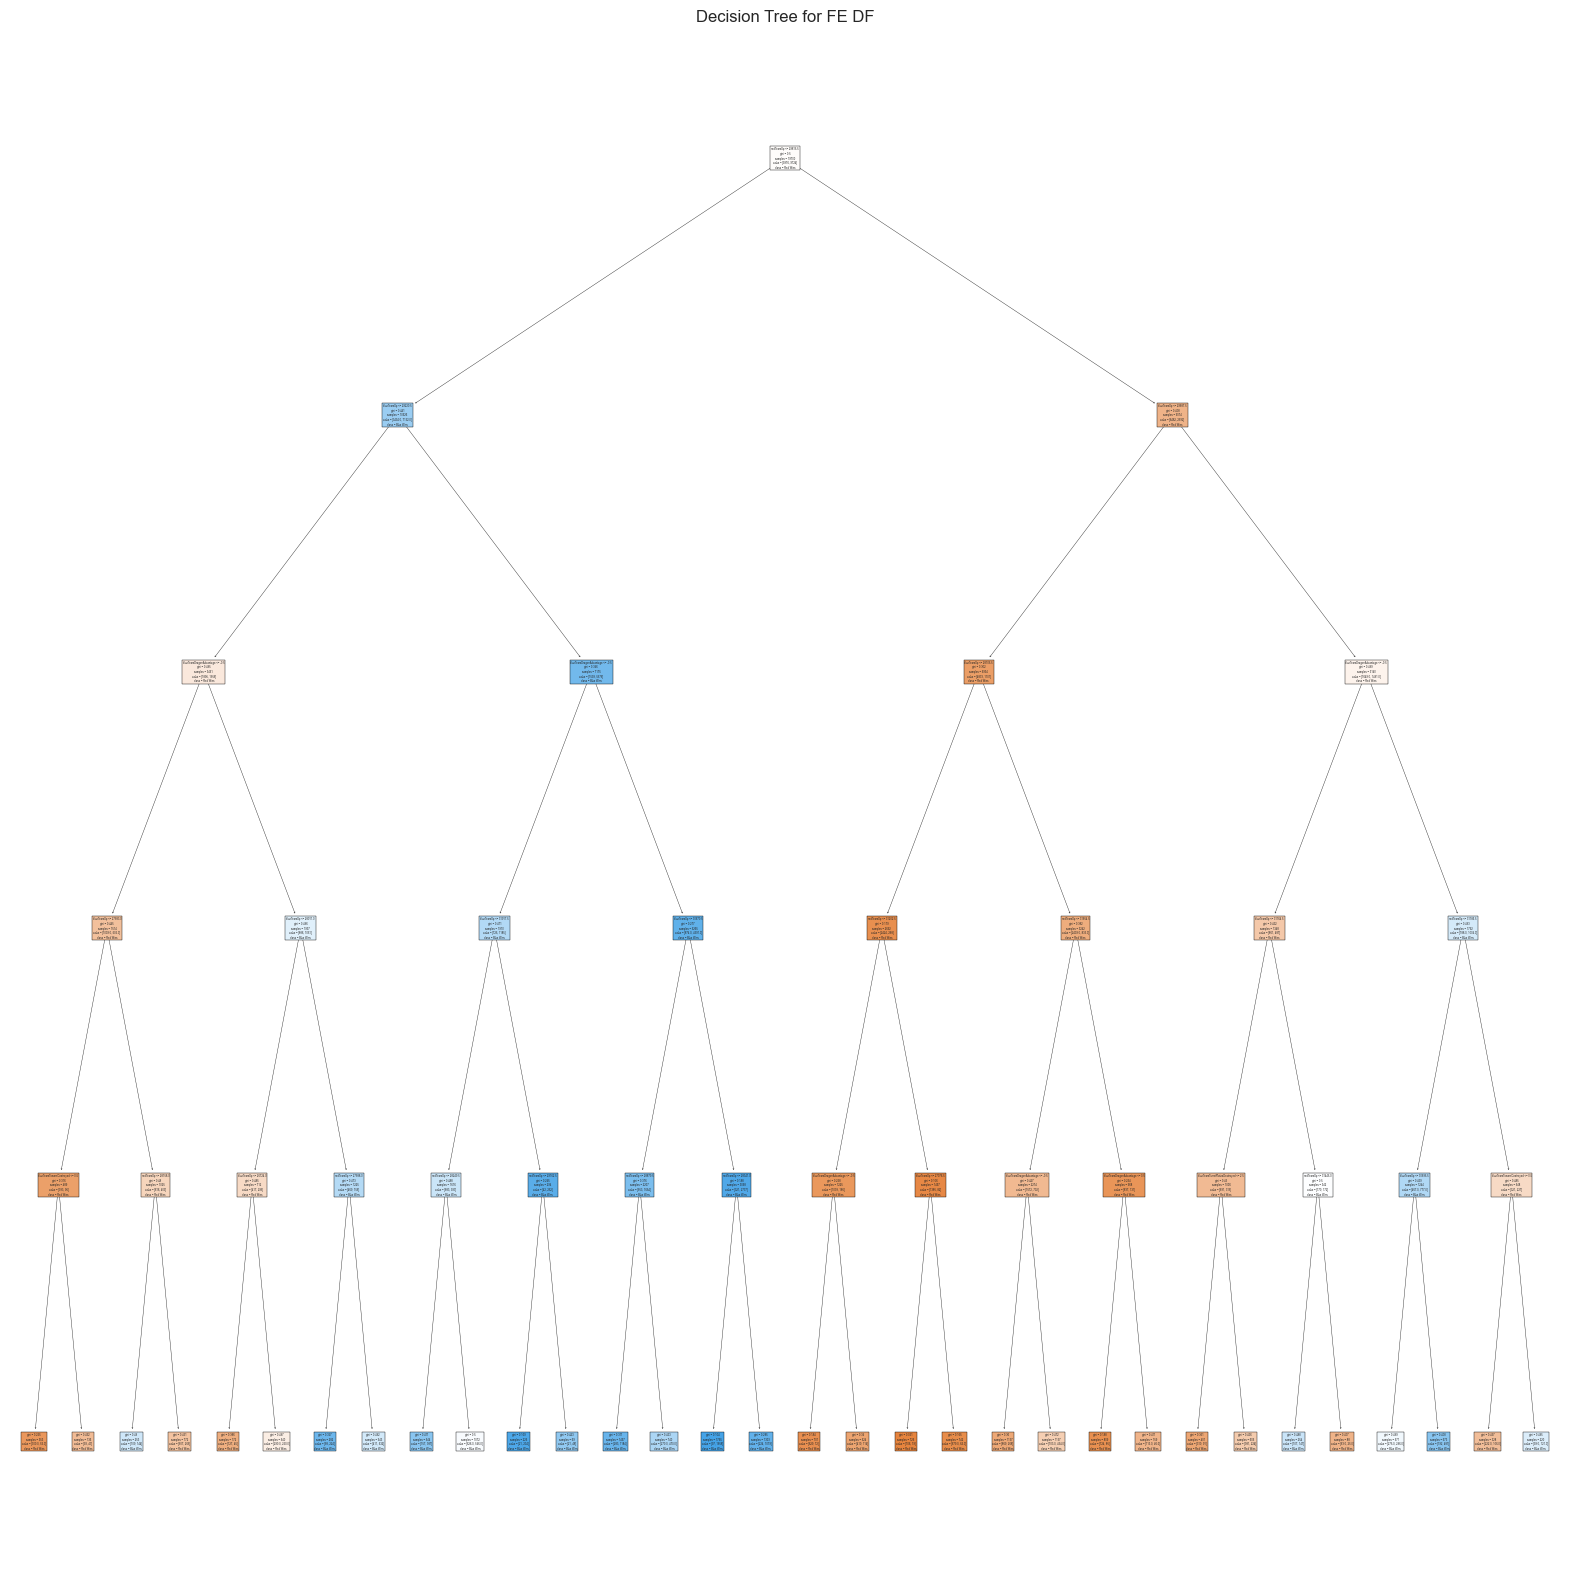

Accuracy for FE DF: 0.73

Best model for FE Removal DF:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')



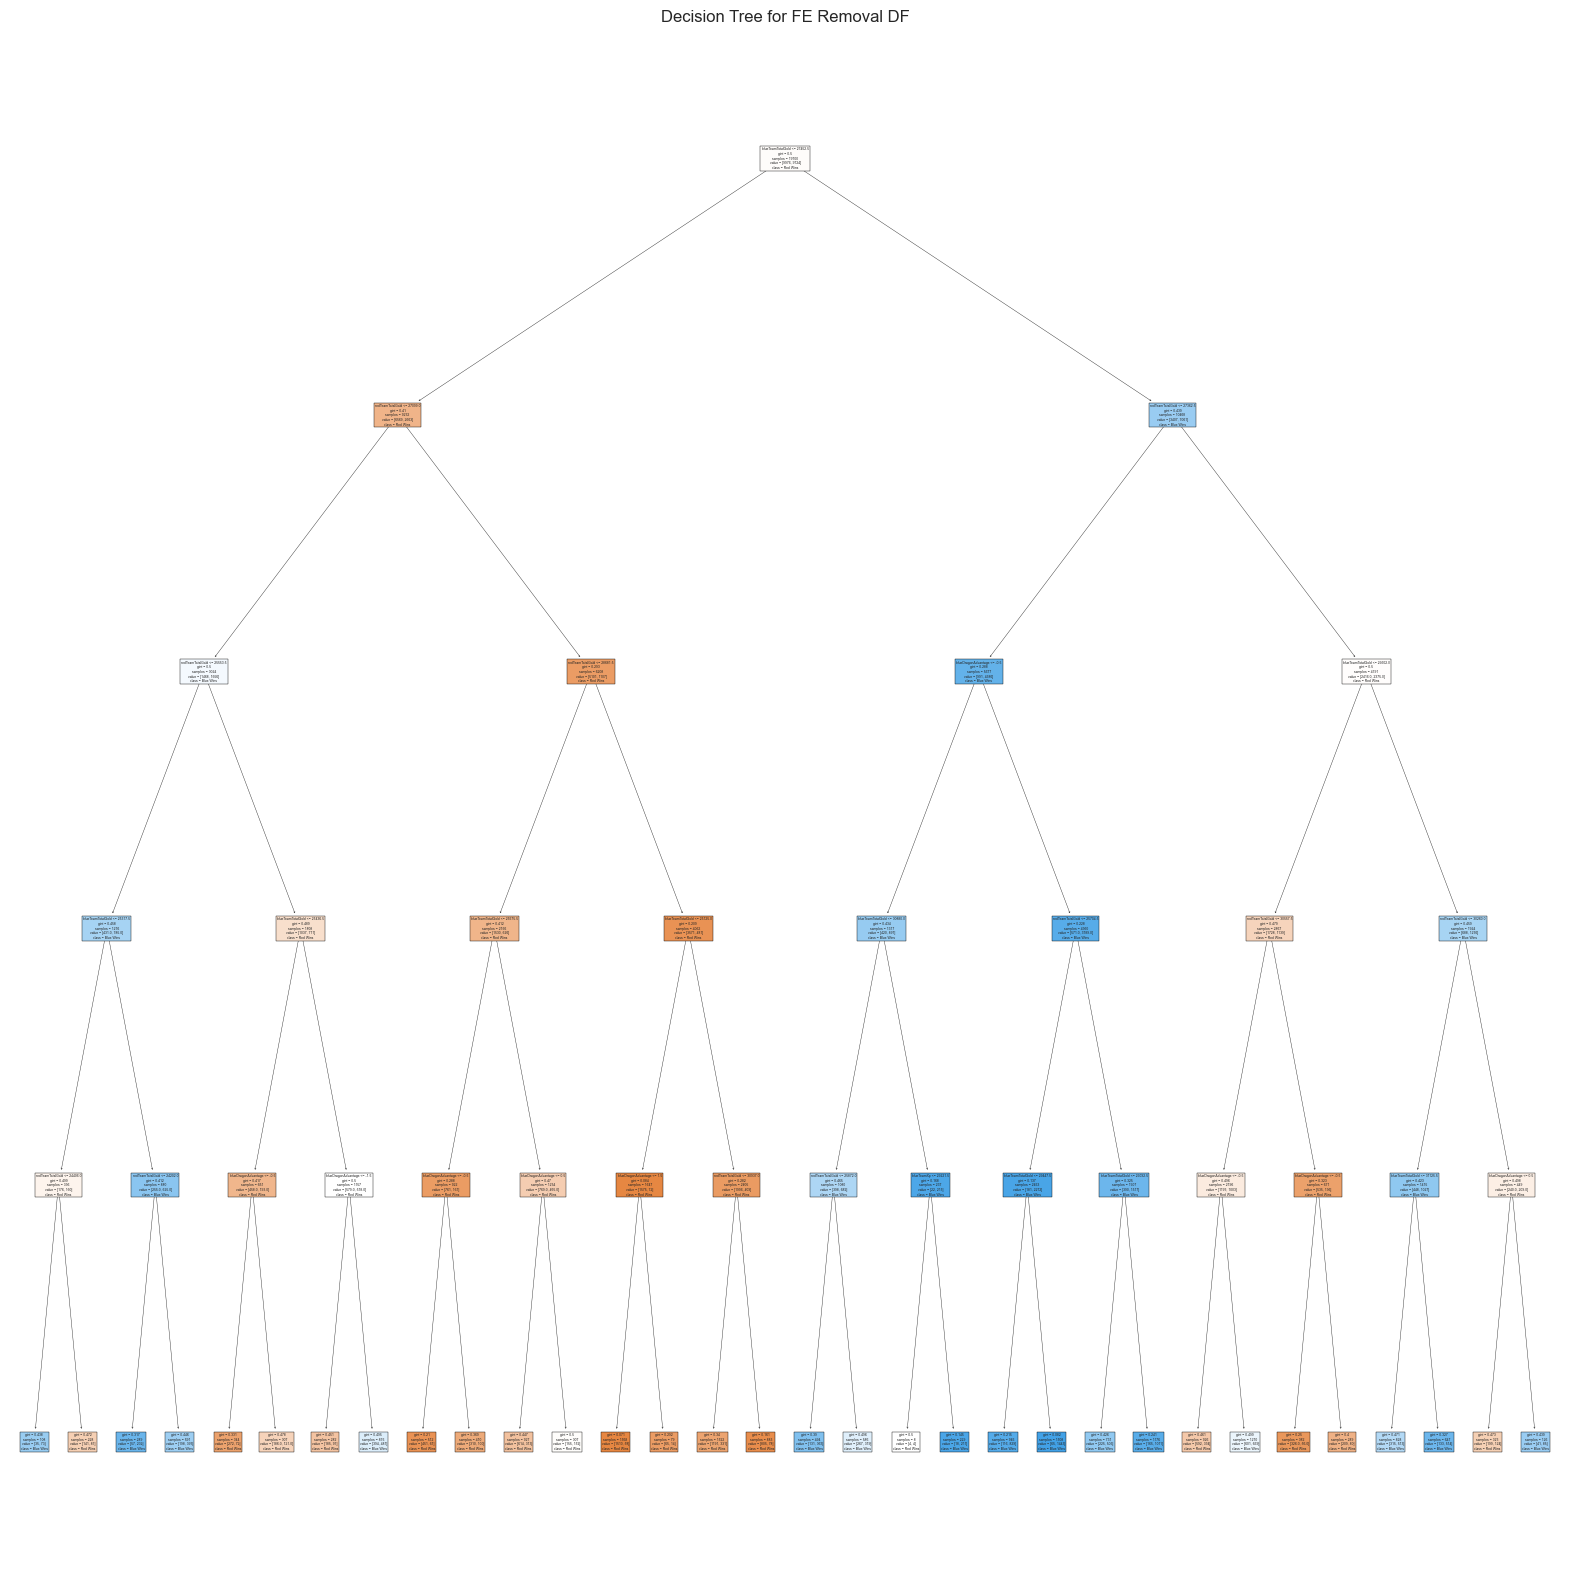

Accuracy for FE Removal DF: 0.75



In [108]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
# Train the model decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

def train_and_visualize_decision_tree(df, df_name):
    all_inputs = df.drop('blueWin', axis=1)
    all_labels = df['blueWin'].values

    # Split the data into training and testing sets
    training_inputs, testing_inputs, training_classes, testing_classes = train_test_split(all_inputs, all_labels, test_size=0.10)

    # Define the model and cross-validation
    model = DecisionTreeClassifier()
    cross_validation = StratifiedKFold(n_splits=10)
    param_grid = {
        'max_depth': range(1, 10),
        'criterion': ['gini', 'entropy']
    }

    # Perform grid search
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=cross_validation)
    grid_search.fit(training_inputs, training_classes)

    # Get the best model
    model = grid_search.best_estimator_

    # Print the model
    print(f"Best model for {df_name}:\n{model}\n")

    # Save the decision tree to a file
    with open(f'{df_name}_dtc.dot', 'w') as out_file:
        out_file = tree.export_graphviz(model, out_file=out_file, feature_names=all_inputs.columns, class_names=['Red Wins', 'Blue Wins'])

    # Plot the decision tree
    fig = plt.figure(figsize=(20, 20))  # Adjusted for better readability
    _ = tree.plot_tree(model, filled=True, feature_names=all_inputs.columns, class_names=['Red Wins', 'Blue Wins'])
    plt.title(f"Decision Tree for {df_name}")
    plt.show()

    # Print the accuracy
    accuracy = model.score(testing_inputs, testing_classes)
    print(f"Accuracy for {df_name}: {accuracy:.2f}\n")

train_and_visualize_decision_tree(df, "Original DF")
train_and_visualize_decision_tree(df_final, "FE DF")
train_and_visualize_decision_tree(df_removed, "FE Removal DF")



The decision tree classifiers already give us an idea of how the first feature extraction actually results in worse results, due to the extracted feature being low quality. Thus, for the final test of multiple algorithms, we will be utilizing only the original dataframe and the dataframe with removed features in order to compare training times.

For the comparison, we will use the Pycarets functions, which allow us to automatically create and train many different models, and then plot their results.

In [109]:
from pycaret.classification import *

exp1 = setup(data = df, target = 'blueWin', session_id=123, normalize=True, transformation=True)

best_model = compare_models()

final_model = finalize_model(best_model)

print("Original Data Frame")
print(final_model)

,Description,Value
0,Session id,123
1,Target,blueWin
2,Target type,Binary
3,Original data shape,"(21889, 28)"
4,Transformed data shape,"(21889, 28)"
5,Transformed train set shape,"(15322, 28)"
6,Transformed test set shape,"(6567, 28)"
7,Numeric features,27
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7602,0.8448,0.7550,0.7589,0.7569,0.5202,0.5203,0.5080
ridge,Ridge Classifier,0.7596,0.8444,0.7541,0.7586,0.7562,0.5192,0.5193,0.0620
lda,Linear Discriminant Analysis,0.7596,0.8444,0.7539,0.7586,0.7562,0.5190,0.5192,0.0800
gbc,Gradient Boosting Classifier,0.7592,0.8431,0.7517,0.7591,0.7553,0.5182,0.5183,0.5850
rf,Random Forest Classifier,0.7547,0.8353,0.7446,0.7559,0.7501,0.5093,0.5095,0.3870
ada,Ada Boost Classifier,0.7547,0.8372,0.7489,0.7537,0.7512,0.5092,0.5094,0.1870
lightgbm,Light Gradient Boosting Machine,0.7546,0.8382,0.7492,0.7534,0.7512,0.5091,0.5092,0.2820
et,Extra Trees Classifier,0.7539,0.8359,0.7453,0.7544,0.7498,0.5078,0.5079,0.2960
svm,SVM - Linear Kernel,0.7509,0.8324,0.7229,0.7622,0.7416,0.5016,0.5028,0.0780
knn,K Neighbors Classifier,0.7186,0.7817,0.7176,0.7148,0.7161,0.4371,0.4372,0.4150


Original Data Frame
Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['blueTeamControlWardsPlaced',
                                             'blueTeamWardsPlaced',
                                             'blueTeamTotalKills',
                                             'blueTeamDragonKills',
                                             'blueTeamHeraldKills',
                                             'blueTeamTowersDestroyed',
                                             'blueTeamInhibitorsDestroyed',
                                             'blueTeamTurretPlatesDestroyed',
                                             'blueTeamFirstBlood',
                                             'blueTeamMinionsKi...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
         

In [110]:
from pycaret.classification import *

exp1 = setup(data = df_removed, target = 'blueWin', session_id=123, normalize=True, transformation=True)

best_model = compare_models()

final_model = finalize_model(best_model)

print("FE Removed Data Frame")
print(final_model)

,Description,Value
0,Session id,123
1,Target,blueWin
2,Target type,Binary
3,Original data shape,"(21889, 23)"
4,Transformed data shape,"(21889, 23)"
5,Transformed train set shape,"(15322, 23)"
6,Transformed test set shape,"(6567, 23)"
7,Numeric features,22
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7611,0.8449,0.7571,0.7593,0.7581,0.5222,0.5223,0.0620
ridge,Ridge Classifier,0.7607,0.8446,0.7567,0.7589,0.7577,0.5213,0.5214,0.0620
lda,Linear Discriminant Analysis,0.7607,0.8446,0.7567,0.7589,0.7577,0.5213,0.5214,0.0560
ada,Ada Boost Classifier,0.7580,0.8379,0.7492,0.7588,0.7539,0.5159,0.5160,0.2000
gbc,Gradient Boosting Classifier,0.7571,0.8428,0.7502,0.7567,0.7534,0.5142,0.5143,0.5490
rf,Random Forest Classifier,0.7528,0.8347,0.7413,0.7547,0.7478,0.5055,0.5057,0.3370
lightgbm,Light Gradient Boosting Machine,0.7519,0.8375,0.7442,0.7518,0.7479,0.5036,0.5037,0.2450
et,Extra Trees Classifier,0.7508,0.8345,0.7414,0.7517,0.7464,0.5015,0.5017,0.2430
svm,SVM - Linear Kernel,0.7449,0.8327,0.7035,0.7629,0.7317,0.4894,0.4912,0.0760
knn,K Neighbors Classifier,0.7133,0.7788,0.7124,0.7094,0.7108,0.4265,0.4266,0.1090


FE Removed Data Frame
Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['blueTeamControlWardsPlaced',
                                             'blueTeamWardsPlaced',
                                             'blueTeamHeraldKills',
                                             'blueTeamTowersDestroyed',
                                             'blueTeamInhibitorsDestroyed',
                                             'blueTeamTurretPlatesDestroyed',
                                             'blueTeamFirstBlood',
                                             'blueTeamJungleMinions',
                                             'blueTeamTotalGold', 'blueTeamXp',
                                             'blu...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
      

With this, we can see across the board that the removal feature extraction resulted in about the same results and overall better times, with a few exceptions that could be written down to individual run variations. So, it is fair to assume the second feature extraction was successful! <br> <br>
We have obtained up to 76% accuracy with the Logistic Regression algorithm, which seems to be generally our best choice out of all, in predicting the outcome of a League of Legends match at 15 minutes, which is pretty impressive, considering the very non-deterministic nature of the game, indicated by the considerably low correlation between the highest correlated feature and winning, and the clear lack of countless useful features which end up affecting the game much more, but are sometimes unquantifiable, like teamfights won, individual lane advantages, characters used, first time character usage, or people just purposefully playing at a lower level, there are millions of features which could be brought to light to further these predictions. Regardless, for this dataset, this is a pretty good result.

## Plotting the confusion matrix

Now, to properly display the amount of cases properly predicted both for blue wins and red wins, we shall use a confusion matrix.

Logistic Regression
0.7674737322978529
Confusion Matrix:


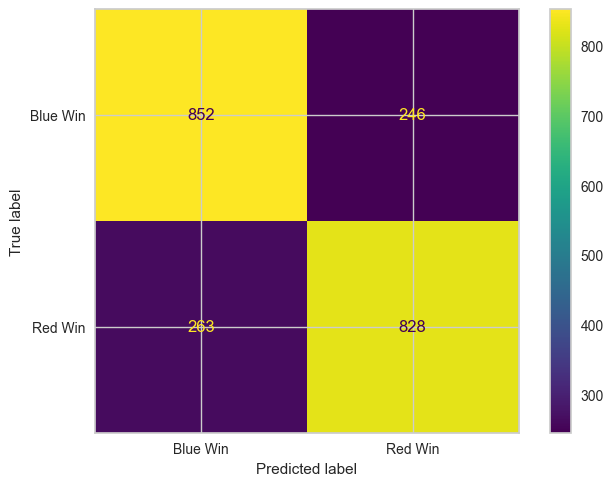

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Prepare the data
all_inputs = df_removed.drop('blueWin', axis=1)
all_labels = df_removed['blueWin'].values

# Split the data into training and testing sets
training_inputs, testing_inputs, training_classes, testing_classes = train_test_split(all_inputs, all_labels, test_size=0.10, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=50000)  # Increase max_iter if needed
model.fit(training_inputs, training_classes)

predictions = model.predict(testing_inputs)

# Print the accuracy
print("Logistic Regression")
print(model.score(testing_inputs, testing_classes))

# Print the confusion matrix
print("Confusion Matrix:")
ConfusionMatrixDisplay(confusion_matrix(testing_classes, predictions), display_labels=["Blue Win", "Red Win"]).plot()